<a href="https://colab.research.google.com/github/PhuongTa/hocmay/blob/main/Ch%C6%B0%C6%A1ng_3_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết Nối + Tải Dữ Liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORT LIBRARIES
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to make output stable across runs
random_state = 42


# Where to save figure
PROJECT_ROOT_DIR = "drive/MyDrive/HOCMAY/working/"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#SOURCE_PATH = 'datasets/mnist'

In [3]:
IMAGES_PATH

'drive/MyDrive/HOCMAY/working/images/classification'

In [4]:
# Function to save figure
def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure... " + fig_id)
  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)



#MNIST version 1.0

**Lưu ý:** từ Scikit-Learn 0.24, theo mặc định thì `fetch_openml()` sẽ trả về một `DataFrame` của Pandas.

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* data chứa một mảng hai chiều, mỗi hàng ứng với một mẫu dữ liệu và mỗi cột ứng với một đặc trưng
* target chứa một mảng các nhãn

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

MNIST chứa `70,000 ảnh` với `784 đặc trưng` trên từng ảnh.
* Lí do là mỗi ảnh chứa `28×28 điểm ảnh`, và mỗi đặc trưng đại diện cho cường độ của một điểm ảnh với giá trị nằm trong khoảng `từ 0 (trắng) đến 255 (đen)`.

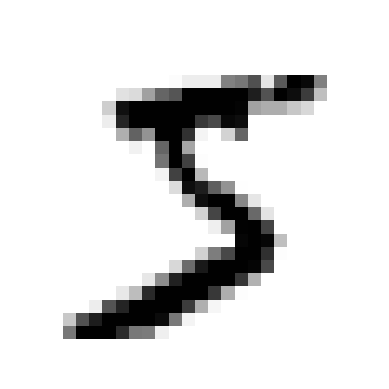

In [9]:
# Kiểm tra mẫu đầu tiên
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= "binary")
plt.axis("off")
plt.show()

In [10]:
y[0]

'5'

Các nhãn `(labels)` đang được `lưu trữ dưới dạng dữ liệu chuỗi`, Ta cần `chuyển sang dữ liệu số`.

In [11]:
y = y.astype(np.uint8)
y[0]

5

In [12]:
# Plot_digit
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

In [13]:
# plot_digits (extra)
def plot_digits(instances, images_per_row=10, **options):
  # shape(28,28)
  size = 28

  # đảm bảo image_per_row không vượt quá số lượng instances
  images_per_row = min(len(instances), images_per_row)

  # reshape all images in instances
  images = [instance.reshape(size, size) for instance in instances]

  # Tính số hàng cần thiết để hiển thị tất cả hình ảnh.
  n_row_indeed = (len(instances) - 1) // images_per_row + 1
                   # (98 - 1 // 10) + 1 = 10

  # danh sách images hiển thị
  row_images = []

  # Tính số lượng hình trống cần thêm vào để đâỳ lưới
  n_image_empty = n_row_indeed * images_per_row - len(instances)
                  # 10 * 10 - 98 = 2 (ô trống)

  # Thêm các hình ảnh rỗng vào cuối danh sách để điền đầy các ô trống.
  images.append(np.zeros((size, size * n_image_empty)))

  for row in range(n_row_indeed):
    # Lấy ra một hàng hình ảnh từ danh sách images.
    rimages = images[row * images_per_row : (row + 1) * images_per_row]

    # Kết hợp các hình ảnh trong hàng lại thành một hình ảnh lớn và thêm nó vào row_images.
    row_images.append(np.concatenate(rimages, axis=1))

  # Kết hợp các hàng hình ảnh lại thành một hình ảnh lớn.
  image = np.concatenate(row_images, axis=0)

  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")

Saving figure... more_digits_plot


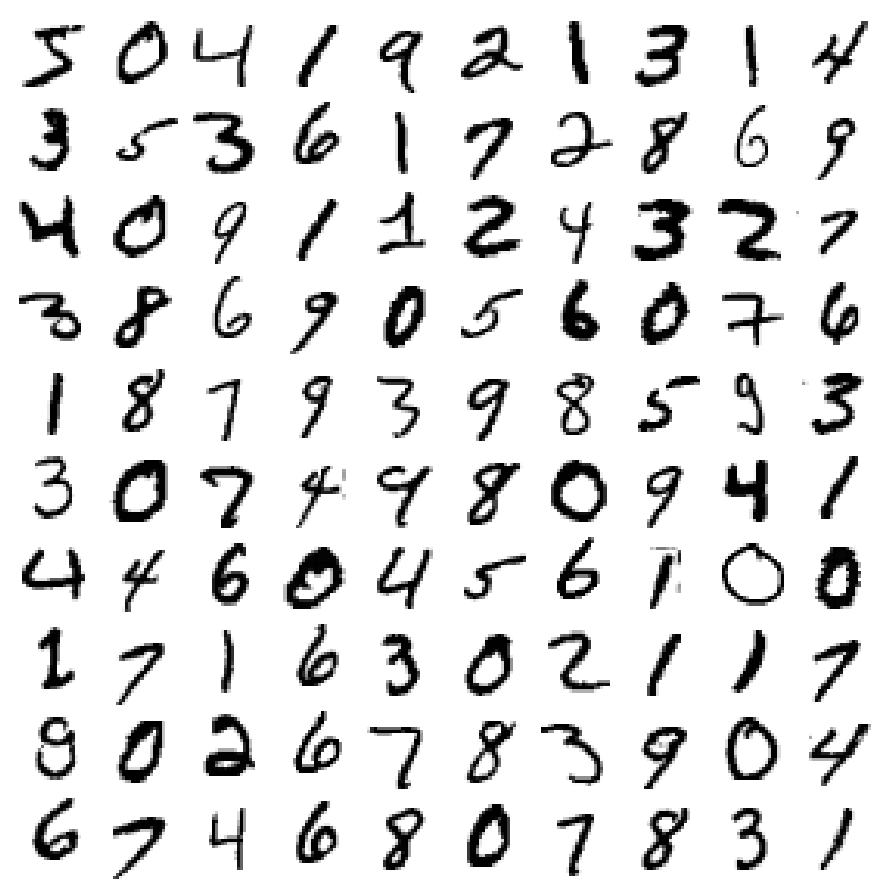

In [14]:
# print first - 100 numbers
plt.figure(figsize = (9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row = 10)

save_fig("more_digits_plot")
plt.show()

Theo `mnist["DESCR"]`: It can be split in a **`training set`** of the first **`60,000 examples`**, and a **`test set`** of `10,000 examples`

In [15]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

Ta cần đảm bảo tất cả các fold trong kiểm định chéo sẽ tương tự (không thiếu vài chữ số), và một số thuật toán nhạy cảm với thứ tự mẫu huấn luyện và sẽ hoạt động kém nếu liên tục nhận được nhiều mẫu có cùng nhãn => nên ta sẽ xáo trộn tập huấn luyện.

Tuy nhiên, *TẬP HUẤN LUYỆN ĐÃ ĐƯỢC XÁO TRỘN SẴN.*

# HUẤN LUYỆN BỘ PHÂN LOẠI NHỊ PHÂN (BINARY CLASSIFICATION)

Bài toán: `Bộ nhận diện số 5
- Xác định một chữ số
- Chỉ phân biệt giữa hai lớp 5 và không 5

In [16]:
y_train_5 =(y_train == 5) # True với tất cả là 5, False với các số khác
y_test_5 = (y_test == 5)

## Mô hình `(SGD)` Hạ Gradient Ngẫu nhiên (Stochastic Gradient Descent).

Ưu điểm là khả năng xử lý tập dữ liệu rất lớn hiệu quả.

- Huấn luyện từng mẫu dữ liệu độc lập
- Thích hợp cho học trực tuyến.

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42) #max_iter=1000, tol=1e-3 #default
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

## Sử dụng cross_val_score của sklearn

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Ta đạt được độ chính xác 95% trên tất cả các fold kiểm định chéo??? - có nên vui mừng?
- **Ta cần kiểm tra thêm**

Hãy xem thử độ chính xác của một bộ phân loại cực kỳ đơn giản là `gán cho tất cả các ảnh cùng một nhãn “không phải 5”`

In [20]:
from sklearn.base import BaseEstimator

class Never5Classier(BaseEstimator):
  def fit(self, X, y=None):
    """
    Phương thức không thực hiện bất kỳ việc đào tạo nào và chỉ đơn giản trả về chính bản thân đối tượng.
    Điều này phản ánh ý nghĩa của mô hình này: không cần đào tạo, vì nó luôn luôn dự đoán sai
    """
    return self

  def predict(self, X):
    # Trả về giá trị toàn False vì luôn dự đoán không phải là 5.
    return np.zeros((len(X), 1), dtype=bool)

In [21]:
never_5_clf = Never5Classier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.91125, 0.90855, 0.90915])

* Mô hình này có độ chính xác  trên 90%. **WOW!!!** - Đừng vội mừng

* Điều này xảy ra là do chỉ có khoảng 10% số ảnh 5.
* Nếu luôn dự đoán một ảnh `không phải 5`, ta sẽ đúng khoảng **90%** số lần.

Điều này chứng mình `Accuracy` không phải phép đo chất lượng cho các bộ phân loại `classifier`, đặc biệt là khi ta đang làm việc với tập dữ liệu lệch `Skewed dataset` tức là khi một vài lớp có nhiều dữ liệu hơn các lớp khác.

## Hàm đánh giá sử dụng StratifiedKFold
- Có chức năng tương tự Cross_val_score.

Lớp `StratifiedKFold` thực hiện `lấy mẫu stratified` để tạo ra các fold chứa tỉ lệ đại diện của mỗi lớp. Tại mỗi vòng lặp, đoạn mã tạo một bản sao của bộ phân loại, huấn luyện bản sao đó trên các fold huấn luyện và dự đoán trên fold kiểm tra, rồi sau đó đếm số lượng và tính tỉ lệ dự đoán đúng.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle= True, random_state=42)
scores = []
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)

  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  scores.append(n_correct / len(y_pred))

print(scores)

[0.9669, 0.91625, 0.96785]


## Ma trận nhầm lẫn (Confusion matrix)

In [23]:
from sklearn.model_selection import cross_val_predict

#cross_val_predict() thực hiện kiểm định chéo K-fold,
# nhưng hàm này trả về các dự đoán trên mỗi fold kiểm tra thay vì điểm số đánh giá.

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

```
                                  Dự đoán
    Thực tế          |   Âm tính     |      Dương tính
---------------------------------------------------------                       
                     |  True-Neg.    |     False-Pos.
(`!5`) Âm tính       |   53892      |       687
---------------------------------------------------------
                     |  False-Neg    |      True-Pos
(`5`)  Dương tính    |   1891       |       3530
                                                          ^
                                                          | Precision
                                                <- Recall
```

- Phép đo độ chính xác của các dự đoán cho lớp dương (precision)
  ```
  precision = TP / (TP + FP)
  ```
  
  - TP: mẫu dương tính thật.
  - FP: mẫu dương tính giả

- Độ nhạy (Sensitivity) hoặc tỷ lệ dương tính thật (`true positive rate - TPR)`: là tỷ lệ mẫu dương được phát hiện đúng bởi bộ phân loại.
  ```
  recall = TP / (TP + FN)
  ```
  FN: mẫu âm tính giả


In [25]:
y_train_perfect_predictions = y_train_5 # gỉả sử chúng ta đạt được sự hoàn hảo.
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [26]:
from sklearn.metrics import precision_score, recall_score
print("Độ chính xác: ", precision_score(y_train_5, y_train_pred)) # 3530 / (3530 + 687)

print("Độ nhạy: ", recall_score(y_train_5, y_train_pred)) # 3530 / (3530 + 1891)


Độ chính xác:  0.8370879772350012
Độ nhạy:  0.6511713705958311


- Trong tổng số lần bộ phân loại: gán nhãn `một ảnh là 5`, nó chỉ đúng `precision: 83.7%` số lần.
- Trên tổng `số ảnh số 5`, nó chỉ phát hiện được `recall: 65.1%` số ảnh.

### F-Score
- trung bình điều hoà của recall và precision.
- Một bộ phân loại chỉ có thể đạt được `chỉ số F1 cao` nếu `cả presion và recall đều cao`
```
    F1 = 2 X (precision x recall) / (precision + recall)
```    
    hoặc
```    
    F1 = TP / (TP + (FN + FP)/2)
```


In [27]:
from sklearn.metrics import f1_score

f1_scr = f1_score(y_train_5, y_train_pred)
print("f1_score: ", f1_scr)

f1_score:  0.7325171197343846


## Precision/Recall Trade off

In [28]:
# Sử dụng decision_function() thay predict(). Trả về số điểm của mỗi mẫu
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [29]:
threshold = 0 # Sử dụng ngưỡng 0 cùng phương thức predict.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [30]:
threshold = 9000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Kết quả này xác nhận rằng tăng mức ngưỡng sẽ làm giảm recall. Bức ảnh được kiểm tra là chữ số 5, bộ phân loại đã dự đoán đúng khi mức ngưỡng bằng 0, nhưng lại thất bại khi mức ngưỡng tăng lên 9,000.

### Làm sao xác định ngưỡng phù hợp?
- Sử dụng cross_val_predict() dự đoán các mẫu trong tập huấn luyện nhưng trả về điểm quyết định thay vì dự đoán.

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method ="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure... precision_recall_vs_threshold_plot


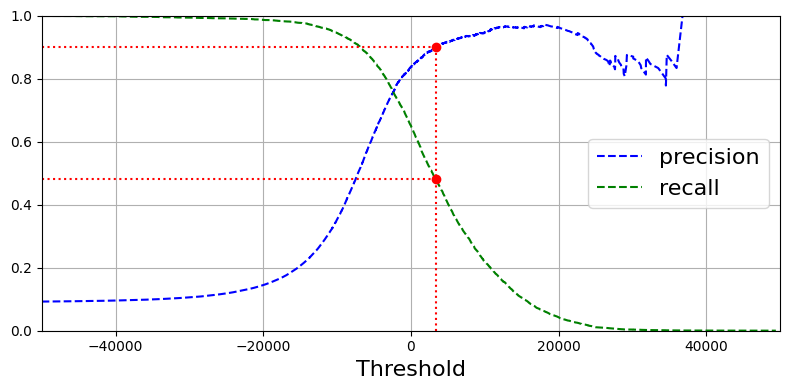

In [33]:
# Vẽ đồ thị của precision và recall theo threshold

def plot_precision_recall_vs_threshold(preicions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000, 0, 1])

recall_90_precision= recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]


plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()


In [34]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure... precision_vs_recall_plot


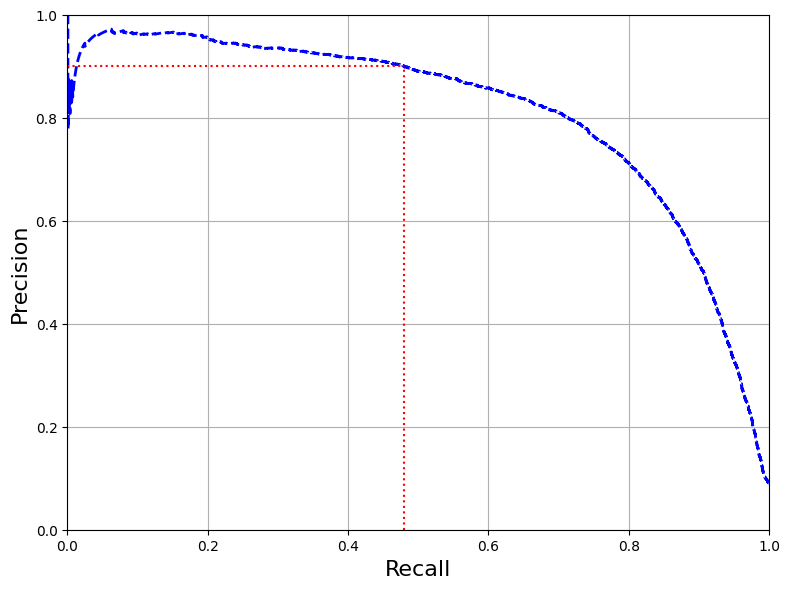

In [35]:
# Vẽ đồ thị precision_recall

def plot_precision_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0.,0.9],"r:")
plt.plot([0.0, recall_90_precision],[0.9,0.9], "r:")
save_fig("precision_vs_recall_plot")
plt.show()


- Có thể thấy `Precision` bắt đầu giảm nhanh ở khoảng `Recall 80%`.
- Ta có thể chọn 1 mức `Precision/Recall Trade off` ở trước đó. VD: 60% - tuỳ thuộc vào dự án cụ thể

In [36]:
# np.argmax() cho ta chỉ số đầu tiên của giá trị lớn nhất
# (giá trị True đầu tiên trong trường hợp này)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #~3370
threshold_90_precision

3370.0194991439557

In [37]:
y_train_pred_90=(y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [38]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [39]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Tìm mức recall ở Precision 60%

In [40]:
threshold_60_precision = thresholds[np.argmax(precisions >= 0.60)]
threshold_60_precision

-5411.202076230331

In [41]:
y_train_pred_60 = (y_scores >= threshold_60_precision)
y_train_pred_60

array([ True, False, False, ...,  True, False, False])

In [42]:
precision_score(y_train_5, y_train_pred_60)

0.6000255819902789

In [43]:
recall_score(y_train_5, y_train_pred_60)

0.8653384984320236

## Đường Cong ROC (Receiver Operating Characteristic)

- Vẽ tỷ lệ dương tính thật `(True Positive Rate TPR - recall)` theo tỷ lệ dương tính giả `(False Positive Rate - FPR)`

- **FPR**: là tỷ lệ các mẫu âm tính bị phân loại sai thành dương tính và bằng 1.
- **TNR**: là tỷ lệ các mẫu âm tính được phân loại đúng. `(specificity)`

- Do đó, ROC là biểu đồ thể hiện `sensitivity - recall` theo `1 - specificity`

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

Saving figure... roc_curve_plot


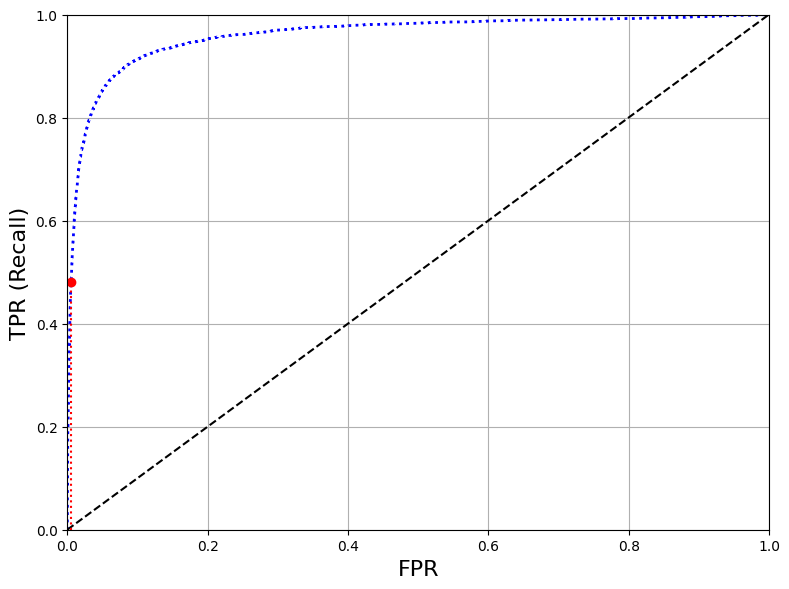

In [45]:
def plot_roc_curve(fpr, tpr, color="b:", label=None):
    plt.plot(fpr, tpr, f"{color}",linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR (Recall)", fontsize=16)
    plt.grid(True)


plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90],[0., recall_90_precision],"r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90],[recall_90_precision],"ro")
save_fig("roc_curve_plot")
plt.show()



Đường cong ROC vẽ tỷ lệ FPR theo tỷ lệ TPR cho tất cả các mức ngưỡng khả dĩ. Hình tròn đỏ đánh dấu mức ngưỡng được chọn `(có recall 43.68%)`

## Chú ý:
👉 Vì `ROC curve` rất giống với `Precision/Recall (PR) ` vậy ta sẽ sử dụng đường cong nào?

- `Chọn đường PR` khi nào `số lượng mẫu dương ít` / `bạn quan tâm đến dương tính giả  (PN) hơn là âm tính giả (FN)`.
- Không thì `sử dụng đường ROC`.

👉 - Sau khi quan sát đường cong ROC ở phía trên và điểm ROC-AUC ta có thể nghĩ bộ phân loại này rất tốt.

👉 - Nhưng điều này phần lớn là vì ta có ít mẫu dương (hình ảnh số 5) hơn các số mẫu âm (không phải 5).

👉 - Ngược lại, từ đường cong PR ta có thể thấy rõ rằng bộ phân loại này vẫn có thể được cải thiện. Đường cong có thể gần góc trên bên phải hơn nữa.)

## AUC (Area under the curve)

- Một bộ phân loại `hoàn hảo sẽ có ROC AUC = 1`
- Một bộ phân loại `ngẫu nhiên sẽ có ROC AUC = 0.5`

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## So sánh RandomForestClassifier / SGDClassifier / LogisticRegression

- `RandomForestClassifier` / `LogisticRegression` không có phương thức `desision_function()` chỉ có `predict_proba()`

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3,
                                   method="predict_proba")

In [48]:
y_scores_forest= y_proba_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure... roc_curve_comparison_plot


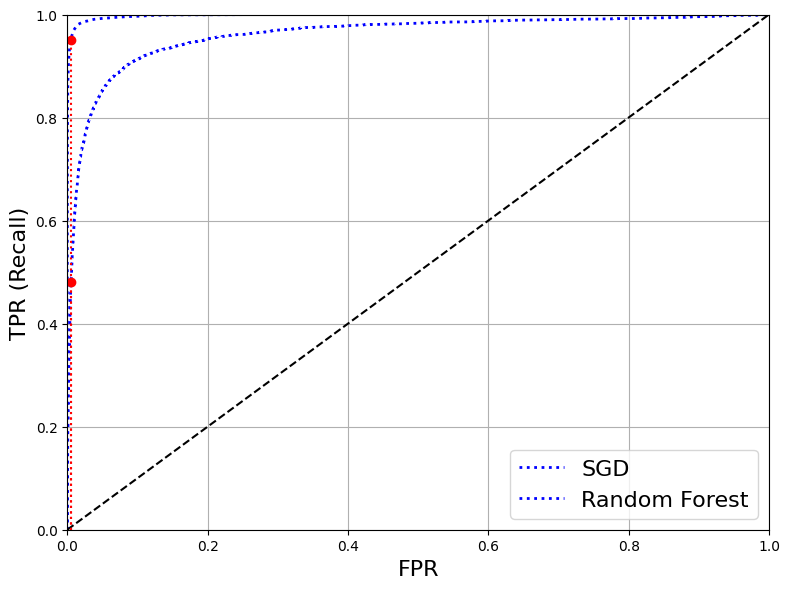

In [49]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:")
plt.plot([fpr_90], [recall_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression

logist_reg = LogisticRegression(random_state=42)
y_proba_logist= cross_val_predict(logist_reg, X_train, y_train_5,
                                  cv=3,
                                  method="predict_proba")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [51]:
y_scores_logist= y_proba_logist[:,1] # score = proba of positive class
fpr_logist, tpr_logist, threshold_logist = roc_curve(y_train_5, y_scores_logist)

Saving figure... roc_curve_comparison_rand_SGD_Logist_plot


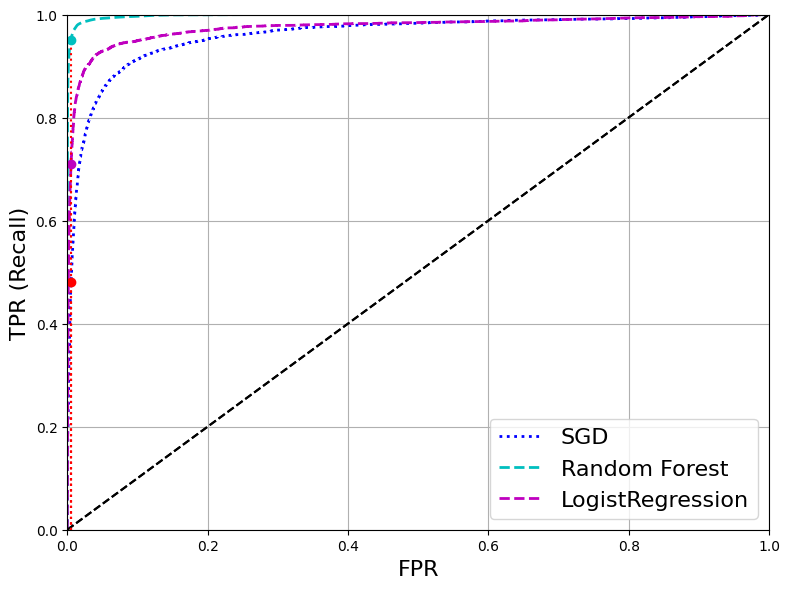

In [52]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
recall_logist = tpr_logist[np.argmax(fpr_logist >= fpr_90)]

plt.figure(figsize=(8, 6))
# plot
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, tpr_forest,"c--", "Random Forest")
plot_roc_curve(fpr_logist, tpr_logist, "m--","LogistRegression")

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") # r:red
plt.plot([fpr_90], [recall_90_precision], "ro")

# RandomForest
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:") # c: cyan
plt.plot([fpr_90], [recall_forest], "co")

# LogistRegression
plt.plot([fpr_90, fpr_90], [0., recall_logist], "r:") #m:magenta
plt.plot([fpr_90], [recall_logist], "mo")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_rand_SGD_Logist_plot")
plt.show()

In [53]:
# function print score ROC AUC score of models

def print_roc_auc_score(y_scores, name_classifier=None):
    print(f"ROC AUC {name_classifier}:\t",roc_auc_score(y_train_5,y_scores))


In [54]:
# ROC AUC RandomForest
print_roc_auc_score(y_scores_forest,"RandomForestClassifier")
# ROC AUC LogisticRegression
print_roc_auc_score(y_scores_logist,"LogisticRegression")
# ROC AUC SGD
print_roc_auc_score(y_scores,"SGDClassifier")

ROC AUC RandomForestClassifier:	 0.9983436731328145
ROC AUC LogisticRegression:	 0.9748673009805543
ROC AUC SGDClassifier:	 0.9604938554008616


👉 Như có thể thấy `đường cong ROC RandomForestClassifier` tốt hơn nhiều so với `SGDClassifier` và `LogisticRegression`: nó gần góc trái hơn do đó điểm `ROC AUC RandomForestClassifier cao nhất.`

### Tính điểm Precision/ Recall của RandomForestClassifier.

In [55]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
# Precision Score
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [56]:
# Recall Score
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Phân loại Đa Lớp (`Multiclass Classifier`)
- phân loại đa thức (`Multinomial Classifier`) gồm các bộ phân loại SGD, RandomForest, NaiveBayes

- Phân loại nhị phân: LogisticRegression, SVC

Tuy nhiên, ta vẫn có thể sử dụng phân loại nhị phân cho bài toán đa lớp với các chiến khác nhau: `one-versus-the-rest (OvR)` hoặc `one-versus-all (OvA)`, `One-versus-One (OvO)`


In [57]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, không phải y_train_5
svm_clf.predict([some_digit])



array([5], dtype=uint8)

- Dưới mã nguồn sklearn svc đã thực hiện huấn luyện `45 bộ phân loại nhị phân` - (`chiến lược OvO`).

- Khi gọi phương thức `decision_function()` nó sẽ trả về 10 điểm số cho mỗi mẫu (thay vì 1). Các điểm số tương ứng với các lớp.

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Bộ phân loại được huấn luyện xong, nó sẽ lưu danh sách các lớp mục tiêu trong `thuộc tính classes_`

In [61]:
svm_clf.classes_[5]

5

Trong trường hợp trên, may mắn là chỉ số của mỗi lớp trong `mảng classes_` cũng chính là lớp đó.

## Ép buộc Sklearn sử dụng chiến lược `OneVsOneClassifier` hoặc `OneVsRestClassifier`.

Ta đưa vào một bộ phân loại vào hàm khởi tạo của một trong 2 lớp trên.


In [62]:
from sklearn.multiclass import OneVsRestClassifier

# Tạo bộ phân loại đa lớp sử dụng chiến lựơc OvR dựa trên SVC().
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))

ovr_clf.fit(X_train[:1000], y_train[:1000]) # chỉ huấn luyện trên 1000 mẫu.

ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [63]:
len(ovr_clf.estimators_)

10

In [64]:
# huấn luyện SGDClassifier / RandomForestClassifier
# Scikit_Learn không phải chạy OvR, OvO
# vì bộ phân loại SGD có thể trực tiếp phân loại mẫu vào nhiều lớp.
# phương thức decision_function() giờ trả về một giá trị mỗi lớp.

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([3], dtype=uint8)

In [65]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

### Kiểm tra chéo đánh giá độ chính xác của SGDClassifier

- Có thể tốn 30p chạy

In [66]:
cross_val_score(sgd_clf, X_train, y_train,
                cv=3,
                scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

- Các fold kiểm tra đều có `kết quả hơn 85%.`
- Nếu sử dụng bộ phân loại ngẫu nhiên: `độ chính xác chỉ có 10%`

✅ - Nhưng kết quả trên **không phải là kết quả tồi**.

- Nhưng ta vẫn có thể làm tốt hơn bằng cách sử dụng `co giãn đầu vào (chuẩn hoá đầu vào) độ chính xác sẽ tăng lên trên 89%`

#### Cải thiện điểm số- Chuẩn hoá đầu vào StandardScaler()

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train,
                cv=3,
                scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## Phân tích Lỗi
- 1 trong những cách cải thiện mô hình sau khi đã tìm thấy mô hình tốt nhất.

In [68]:
# sử dụng cross_val_predict() để trả về điểm số dự đoán.
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [69]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

Saving figure... confusion_matrix_plot_gray


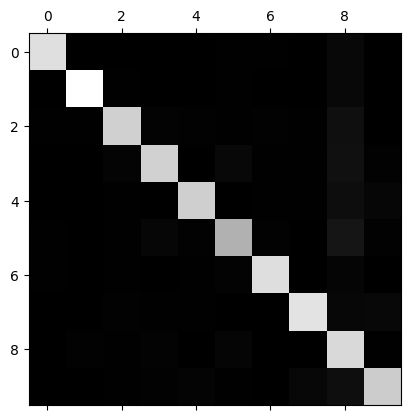

In [70]:
# sử dụng matshow() của Matplotlib
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot_gray", tight_layout=False)
plt.show()

Từ phiên bản sklearn v.1.2 đã xoá bỏ `plot_confusion_matrix()` thay vào đó ta sẽ sử dụng 2 phương thức thay thế bên dưới.
`ConfusionMatrixDisplay.from_estimator()`, `ConfusionMatrixDisplay.from_predictions()`

Saving figure... confusion_matrix_display


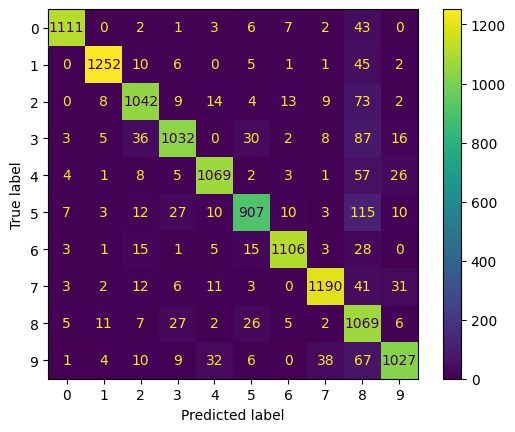

In [71]:
# Từ scikit-learn v.1.2 sử dụng from_predictions hoặc from_estimator
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

X_train_confmx, X_test_confmx, y_train_confmx, y_test_confmx = train_test_split(
    X_train_scaled,
    y_train,
    random_state=42,
    test_size=0.2
)

sgd_clf_confmx = SGDClassifier(random_state = 42)

sgd_clf_confmx.fit(X_train_confmx, y_train_confmx)

# Sử dụng phương thức thứ 1.
ConfusionMatrixDisplay.from_estimator(sgd_clf_confmx, X_test_confmx, y_test_confmx)
save_fig("confusion_matrix_display", tight_layout=False)
plt.show()


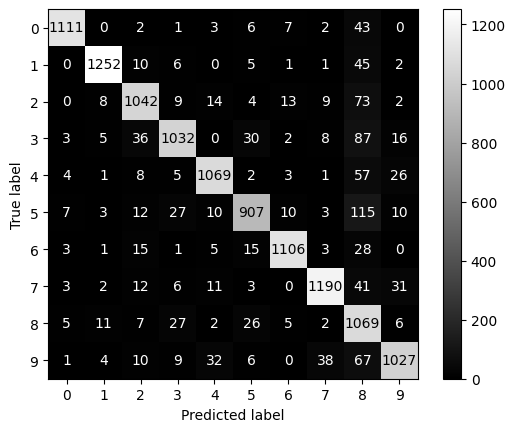

In [72]:
# Sử dụng phương thức thứ 2
# Chọn cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

y_pred_confmx = sgd_clf_confmx.predict(X_test_confmx)

ConfusionMatrixDisplay.from_predictions(y_test_confmx, y_pred_confmx,cmap="gray")#default cmap="viridis"
#save_fig("confusion_matrix_display", tight_layout=False)
plt.show()

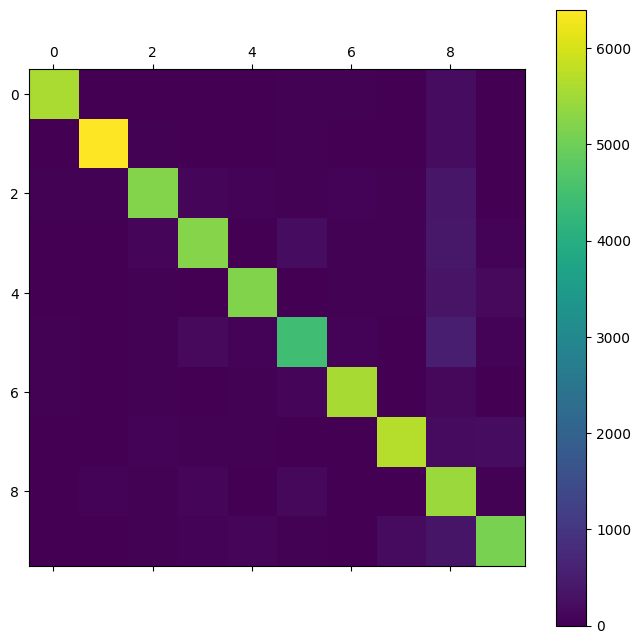

In [73]:
# Định nghĩa hàm plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)

- Confusion matrix trông khá ổn, `đa số tấm ảnh đều nằm trên đường chéo chính`, đồng nghĩa chúng được phân loại chính xác.

- Các ảnh lớp 5 có phần tối hơn các lớp còn lại có thể do:
    - Có thể do số 5 ít ảnh hưởng hơn trong tập dữ liệu.
    - bộ phân loại hoạt động trên lớp này kém hơn những lớp còn lại.

#### Minh hoạ các lỗi

In [74]:
# Tính tổng các giá trị trên từng hàng của conf_mx
# keepdims=True: giữ kq có số chiều như ban đầu
row_sums = conf_mx.sum(axis=1, keepdims=True)

# phép chia element-wise dể được ma trận chuẩn hoá.
norm_conf_mx = conf_mx/row_sums

Saving figure... confusion_matrix_errors_plot


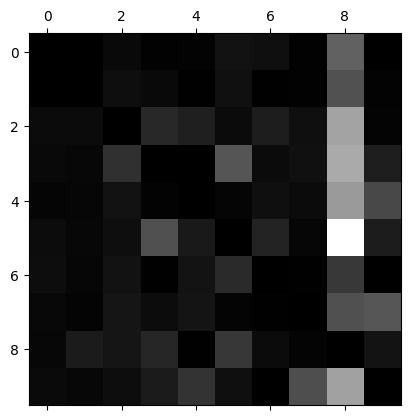

In [75]:
# điền giá trị 0 vào đường chéo chính, để theo dõi các lỗi sai của dự đoán.
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot",tight_layout=False)
plt.show()

Ta có thể thấy rõ các dạng lỗi bộ phân loại phạm phải.

- các hàng biểu thị lớp thực, cột biểu thị lớp dự đoán.

- Cột 8 khá sáng, đồng nghĩa có nhiều ảnh bị phân loại thành 8.

- Tuy nhiên, hàng 8 thì không tệ lắm cho thấy các mẫu trong lớp này đều phân loại chính xác.

- Ngoài ra, lớp 3 và lớp 5 thường bị nhầm lẫn với nhau. (cả 2 chiều)

#### Matrix_confusion Seaborn.heatmap()

Saving figure... confusion_matrix_normalized_heatmap


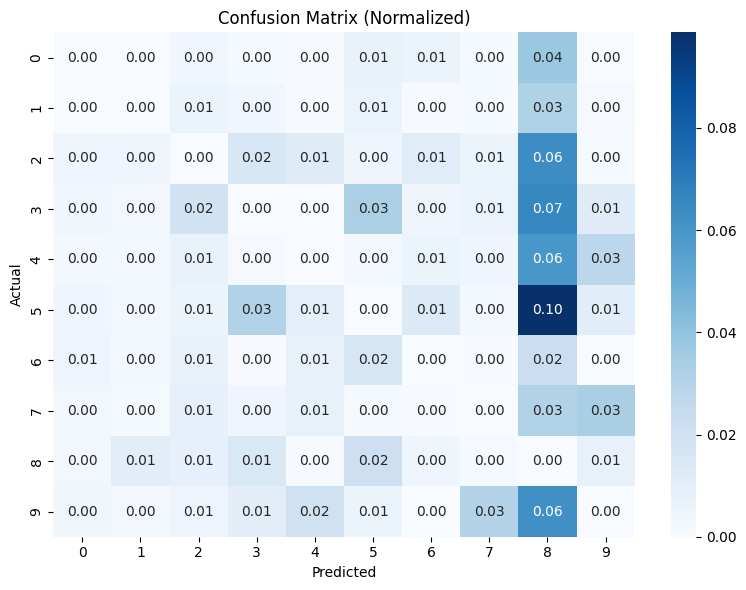

In [76]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(norm_conf_mx, annot=True, fmt=".2f", cmap="Blues")
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

save_fig("confusion_matrix_normalized_heatmap")

<Axes: >

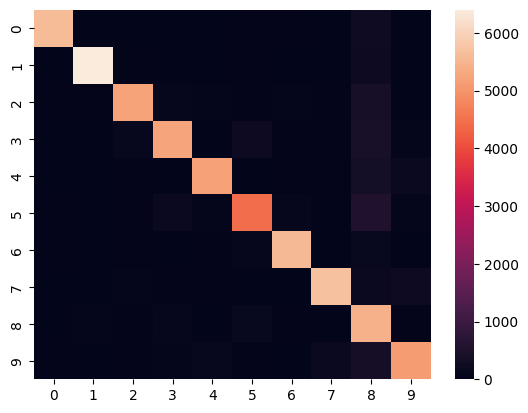

In [77]:
sns.heatmap(conf_mx, annot= False)

👉 **Kết luận**

Nhìn vào ma trận, có vẻ ta nên tập trung vào giảm thiểu việc phân loại nhầm thành 8.

Các giải pháp:

- Thu thập thêm dữ liệu huấn luyện của các số nhìn giống 8 (nhưng không phải là số 8) nhằm giúp bộ phân loại học cách phân biệt giữa chúng và số 8 thật.
- thiết lập những đặc trưng hỗ trợ bộ phân loại. VD: viết thuật toán đếm số đường tròn đóng. (số 8 có 2 đường tròn đóng, 6 có 1, và 5 không có)
- Tiền xử lý ảnh (sử dụng scikit-Image, Pillow, OpenCV) làm nổi bật khuôn mẫu chẳng hạn như các đường tròn đóng.



Phân tích từng lỗi riêng biệt cũng có thể giúp ta tìm ra cách vận hành của bộ phân loại, cũng như nguyên nhân thất bại, nhưng việc này sẽ tốn nhiều thời gian và khó khăn hơn nhiều

Saving figure... error_analysis_digits_plot


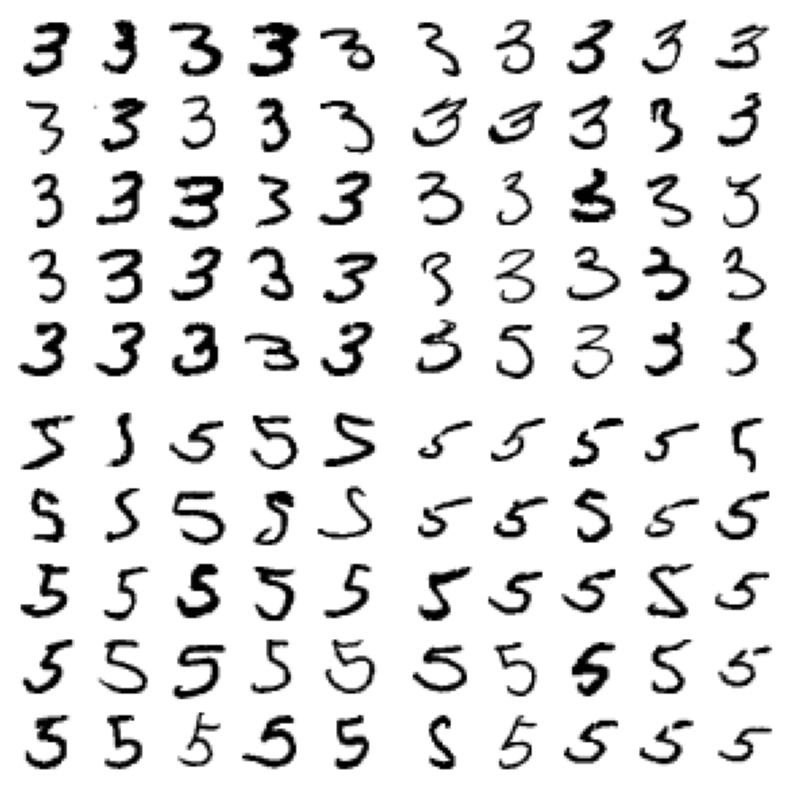

In [78]:
# hiển thị một số mẫu 3, 5
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
# plt.subplot(221) = plt.subplot(2,2,1)
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

#Phân loại Đa Nhãn

In [82]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 == 1)
y_multilabels = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabels)


KNeighborsClassifier()

In [83]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [84]:
# Tính F1 score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabels, cv=3)

# sử dụng average="macro" với giả định mọi nhãn đều quan trọng.
f1_score_macro = f1_score(y_multilabels, y_train_knn_pred, average = "macro")

print(f1_score_macro)

# muốn gán trọng số lớn hơn dựa trên số lượng mẫu của nhãn tương ứng thì ta đặt average="weighted"
f1_score_weighted = f1_score(y_multilabels, y_train_knn_pred, average = "weighted")

print(f1_score_weighted)


0.976410265560605
0.9778357403921755


# Phân loại Đa Đầu Ra

In [88]:
# Tạo tập huấn luyện và kiểm tra từ các ảnh MNIST
# và thêm nhiễu vào mỗi điểm ảnh bằng hàm randint() trong numpy.
# Ảnh mục tiêu sẽ là ảnh gốc không nhiễu

noise = np.random.randint(0,100, (len(X_train), 784))

X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test),784))

X_test_mod = X_test + noise

y_train_mod = X_train

y_test_mod = X_test


Saving figure... noisy_digit_example_plot


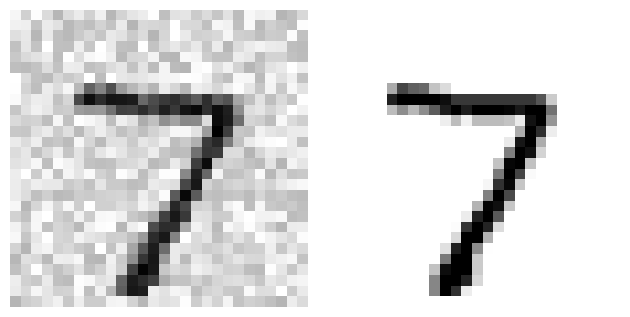

In [90]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure... cleaned_digit_example_plot


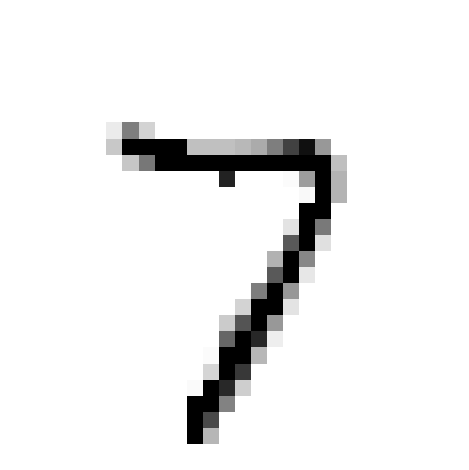

In [92]:
# huấn luyện bộ phân loại khử nhiễu cho tấm ảnh.
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[some_index]])

plot_digit(clean_digit)

save_fig("cleaned_digit_example_plot")

Kết quả khá giống với ảnh mục tiêu!

# Phần bổ sung

## Bộ phân loại giả (tức ngẫu nhiên)

In [93]:
from sklearn.dummy import DummyClassifier

dmy_clf = DummyClassifier(strategy = "prior")

y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train,
                                cv=3,
                                method="predict_proba")

y_scores_dmy = y_probas_dmy[:,1]


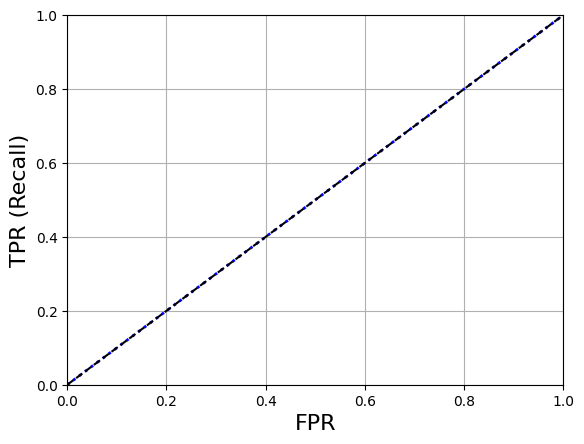

In [94]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)